In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

In [2]:
df = pd.read_csv("D:\Thesis Satria\CICIoT2023_IPCASTD.csv")

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Cyber_MBC\AppData\Local\Temp\ipykernel_8588\1102141346.py:1: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv("D:\Thesis Satria\CICIoT2023_IPCASTD.csv")


In [3]:
print("Shape Dataset:", df.shape)

Shape Dataset: (46686579, 47)


In [4]:
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 34


In [5]:
print("Jumlah missing value per kolom:\n", df.isnull().sum())

Jumlah missing value per kolom:
 flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
l

In [6]:
df_clean = df.drop_duplicates().dropna()
print("Shape sesudah cleaning:", df_clean.shape)

Shape sesudah cleaning: (46686545, 47)


In [7]:
print('Nama Kolom :')
print(df_clean.columns)

Nama Kolom :
Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')


In [8]:
print("Jumlah Serangan Pada Dataset: \n")
df_clean['label'].value_counts()

Jumlah Serangan Pada Dataset: 



label
DDoS-ICMP_Flood            7200488
DDoS-UDP_Flood             5412287
DDoS-TCP_Flood             4497665
DDoS-PSHACK_Flood          4094751
DDoS-SYN_Flood             4059188
DDoS-RSTFINFlood           4045282
DDoS-SynonymousIP_Flood    3598138
DoS-UDP_Flood              3318594
DoS-TCP_Flood              2671445
DoS-SYN_Flood              2028834
BenignTraffic              1098195
Mirai-greeth_flood          991866
Mirai-udpplain              890576
Mirai-greip_flood           751682
DDoS-ICMP_Fragmentation     452489
MITM-ArpSpoofing            307593
DDoS-UDP_Fragmentation      286925
DDoS-ACK_Fragmentation      285104
DNS_Spoofing                178910
Recon-HostDiscovery         134377
Recon-OSScan                 98259
Recon-PortScan               82280
DoS-HTTP_Flood               71864
VulnerabilityScan            37382
DDoS-HTTP_Flood              28790
DDoS-SlowLoris               23426
DictionaryBruteForce         13064
BrowserHijacking              5859
CommandInjecti

In [9]:
# Pengelompokan Jenis Serangan

attack_map = {
    'BenignTraffic': 'BENIGN',
    'DDoS-ICMP_Flood': 'DDoS',
    'DDoS-UDP_Flood': 'DDoS',
    'DDoS-TCP_Flood': 'DDoS',
    'DDoS-PSHACK_Flood': 'DDoS',
    'DDoS-SYN_Flood': 'DDoS',
    'DDoS-RSTFINFlood': 'DDoS',
    'DDoS-SynonymousIP_Flood': 'DDoS',
    'DDoS-ICMP_Fragmentation': 'DDoS',
    'DDoS-UDP_Fragmentation': 'DDoS',
    'DDoS-ACK_Fragmentation': 'DDoS',
    'DDoS-HTTP_Flood': 'DDoS',
    'DDoS-SlowLoris': 'DDoS',
    'DoS-UDP_Flood': 'DoS',
    'DoS-TCP_Flood': 'DoS',
    'DoS-SYN_Flood': 'DoS',
    'DoS-HTTP_Flood': 'DoS',
    'Mirai-greeth_flood': 'Mirai',
    'Mirai-udpplain': 'Mirai',
    'Mirai-greip_flood': 'Mirai',
    'Recon-HostDiscovery': 'Recon',
    'Recon-OSScan': 'Recon',
    'Recon-PortScan': 'Recon',
    'Recon-PingSweep': 'Recon',
    'DictionaryBruteForce': 'Brute Force',
    'CommandInjection': 'Injection',
    'SqlInjection': 'Injection',
    'MITM-ArpSpoofing': 'Network Attack',
    'DNS_Spoofing': 'Network Attack',
    'BrowserHijacking': 'Network Attack',
    'VulnerabilityScan': 'Network Attack',
    'XSS': 'Network Attack',
    'Uploading_Attack': 'Network Attack',
    'Backdoor_Malware': 'Malware',
}

df_clean['Attack Type'] = df_clean['label'].str.strip().map(attack_map)

df_clean.drop('label', axis = 1, inplace = True)

print("Jumlah Serangan Setelah digabungkan: \n")
df_clean['Attack Type'].value_counts()

Jumlah Serangan Setelah digabungkan: 



Attack Type
DDoS              33984533
DoS                8090737
Mirai              2634124
BENIGN             1098195
Network Attack      534842
Recon               317178
Brute Force          13064
Injection            10654
Malware               3218
Name: count, dtype: int64

In [10]:
X = df_clean.drop(['Attack Type'], axis=1)
y = df_clean['Attack Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
size = len(X.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(X_scaled, len(X) // 500):
    ipca.partial_fit(batch)

transformed_features = ipca.transform(X_scaled)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = y.values

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 93.81%


In [12]:
print("Explained Variance per Component:")
for i, var in enumerate(ipca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.2%}")

print(f"\nTotal Variansi Dijelaskan: {sum(ipca.explained_variance_ratio_):.2%}")

Explained Variance per Component:
PC1: 18.28%
PC2: 8.70%
PC3: 6.90%
PC4: 6.62%
PC5: 5.86%
PC6: 4.74%
PC7: 4.32%
PC8: 4.02%
PC9: 3.94%
PC10: 3.65%
PC11: 2.69%
PC12: 2.25%
PC13: 2.19%
PC14: 2.17%
PC15: 2.17%
PC16: 2.17%
PC17: 2.17%
PC18: 2.17%
PC19: 2.16%
PC20: 2.16%
PC21: 1.90%
PC22: 1.39%
PC23: 1.18%

Total Variansi Dijelaskan: 93.81%


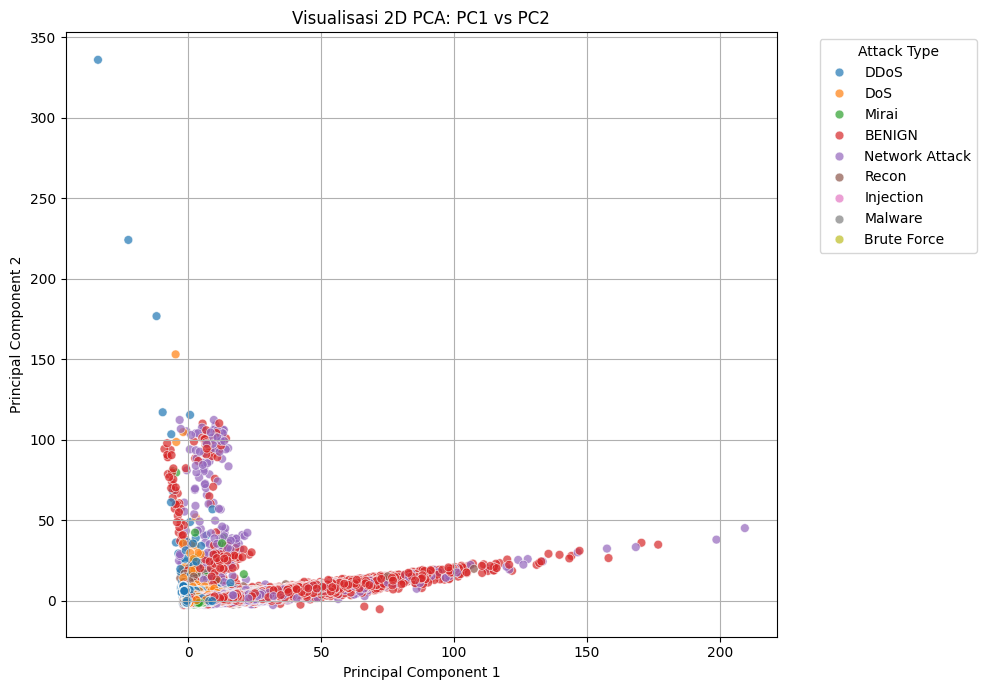

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df,
    x='PC1', y='PC2',
    hue='Attack Type',
    palette='tab10',
    alpha=0.7,
    s=40
)
plt.title('Visualisasi 2D PCA: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


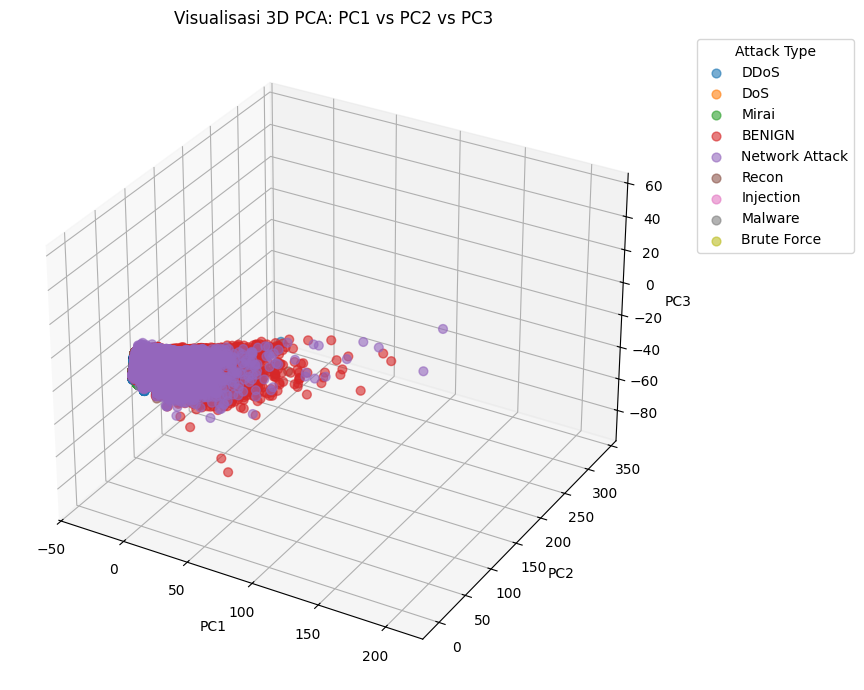

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Ambil warna unik untuk setiap label
labels = df['Attack Type'].unique()
colors = cm.tab10.colors

for i, label in enumerate(labels):
    subset = df[df['Attack Type'] == label]
    ax.scatter(
        subset['PC1'], subset['PC2'], subset['PC3'],
        label=label,
        color=colors[i % len(colors)],
        alpha=0.6,
        s=40
    )

ax.set_title('Visualisasi 3D PCA: PC1 vs PC2 vs PC3')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# # Menampilkan bobot (loading) semua fitur terhadap PC1
# pc1_loadings = ipca.components_[0]  # Baris pertama adalah PC1
# # Misal features.columns adalah list nama fitur asli
# pc1_df = pd.DataFrame({
#     'Feature': X.columns,
#     'PC1_Weight': pc1_loadings
# }).sort_values(by='PC1_Weight', key=abs, ascending=False)

# print(pc1_df)


In [4]:
print("Jumlah data IPCA 50% dari full dataset:", df.shape)
print("Jumlah kelas unik:", df['Attack Type'].nunique())
print("Distribusi kelas:\n", df['Attack Type'].value_counts())

Jumlah data IPCA 50% dari full dataset: (46686545, 24)
Jumlah kelas unik: 9
Distribusi kelas:
 Attack Type
DDoS              33984533
DoS                8090737
Mirai              2634124
BENIGN             1098195
Network Attack      534842
Recon               317178
Brute Force          13064
Injection            10654
Malware               3218
Name: count, dtype: int64


In [5]:
print("Dataset Baru yang Sudah Mengalami PCA:\n")
df

Dataset Baru yang Sudah Mengalami PCA:



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,Attack Type
0,-1.570315,5.977528,-1.476080,0.732345,-0.000648,0.094764,-0.162234,0.011507,-0.141965,0.001621,...,0.000052,0.000518,-0.009284,0.001296,0.004010,-0.070779,-0.335710,-0.226750,0.153835,DDoS
1,-0.814909,0.004052,0.608059,-0.388428,0.002628,0.278565,-0.067293,-0.123631,0.603716,-0.008719,...,-0.002181,-0.003307,0.103659,-0.070365,-0.020010,0.737296,2.047459,0.920033,-0.244196,DoS
2,-1.032093,-0.950032,-0.104136,0.537642,-0.009317,-0.893399,-0.132500,2.228473,-0.365682,-0.010990,...,-0.000015,0.000129,0.000432,0.042702,0.002308,-0.024414,0.055265,0.216578,0.335915,DDoS
3,-0.707924,-1.310261,-1.089426,1.070544,0.063208,-0.533790,-0.291464,-0.431135,-0.708354,0.010310,...,-0.000008,-0.000064,-0.002075,-0.115669,0.003207,-0.002739,-0.219105,0.025943,-0.034347,DoS
4,-0.566427,-0.276547,1.340563,-0.911065,-0.013359,1.758885,0.402980,-0.147580,-0.311739,-0.017964,...,-0.000114,0.000669,-0.007028,0.022299,-0.003283,-0.052900,-0.207114,-0.619832,-0.126224,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46686540,-0.271013,0.107344,0.859863,-0.883887,0.003094,-0.441557,-0.087769,-0.092860,-0.522590,0.008080,...,-0.001636,0.004549,-0.040383,0.049389,-0.012145,-0.126199,0.948028,3.493480,-1.550329,DDoS
46686541,-1.032097,-0.950033,-0.104171,0.537533,-0.009320,-0.893293,-0.132945,2.228551,-0.365706,-0.010990,...,-0.000015,0.000129,0.000432,0.042701,0.002308,-0.024414,0.055263,0.216574,0.335909,DDoS
46686542,-0.848101,-0.258347,0.312842,-0.128747,0.006261,-0.052133,-0.134013,0.088793,0.126193,-0.003644,...,-0.000188,0.000071,-0.000942,-0.009044,-0.003290,0.018987,-0.158888,0.201470,-0.341599,DoS
46686543,-0.720676,-1.311945,-1.089278,1.082156,0.063200,-0.529057,-0.257219,-0.424725,-0.680882,0.010631,...,-0.000014,-0.000038,-0.002273,-0.114668,0.003035,-0.002517,-0.206821,0.026927,-0.055055,DDoS


In [13]:
new_data.to_csv("CICIoT2023_IPCASTD.csv", index=False)
print("Dataset telah disimpan sebagai CICIoT2023_IPCASTD.csv")

Dataset telah disimpan sebagai CICIoT2023_IPCASTD.csv
